# 2. 다층 퍼셉트론(Multi-Layer Perceptron) 구조 복습하기


## 2-2 MLP 모델 복습하기

MLP 모델로 이미지 분류해보기


In [1]:
import sys
import tensorflow as tf
import numpy as np

# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


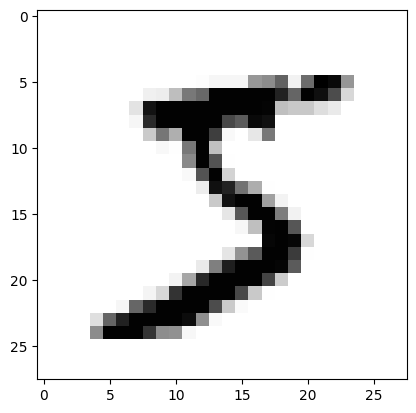

In [2]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [3]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [4]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

print(X_train.shape)
print(X_test.shape)


# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MLP 모델 구조 설계하기


In [6]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 모델의 loss 함수, optimizer, metric을 설정하고 모델을 compile해줍시다.
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())
print()



Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 0.9991 - loss: 0.0050 - val_categorical_accuracy: 0.9766 - val_loss: 0.7445
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9976 - loss: 0.0266 - val_categorical_accuracy: 0.9787 - val_loss: 0.7366
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9972 - loss: 0.0359 - val_categorical_accuracy: 0.9783 - val_loss: 0.7276
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.9980 - loss: 0.0200 - val_categorical_accuracy: 0.9775 - val_loss: 0.6675
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.9984 - loss: 0.0143 - val_categorical_accuracy: 0.9771 - val_loss: 0.7319
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9985 - loss: 0.0124 - val_categorical_accuracy: 0.9787 - val_loss: 0.6774
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9989 - loss: 0.00

[0.04973767697811127, 0.04646586626768112, 0.06342171132564545, 0.04465942829847336, 0.035807572305202484, 0.029051953926682472, 0.035071827471256256, 0.030712412670254707, 0.028911039233207703, 0.022552724927663803, 0.016993017867207527, 0.02823249250650406, 0.03284430503845215, 0.03544265404343605, 0.03121519647538662, 0.030250005424022675, 0.020577264949679375, 0.015138729475438595, 0.017968233674764633, 0.02836867794394493, 0.023217681795358658, 0.00895246397703886, 0.011829770170152187, 0.011398592963814735, 0.020458407700061798, 0.02354203350841999, 0.01570807211101055, 0.00985975842922926, 0.01856888085603714, 0.02440759353339672]
[0.4360547661781311, 0.4810895621776581, 0.5061641335487366, 0.4522342383861542, 0.4246065318584442, 0.47206419706344604, 0.4733797609806061, 0.4897310435771942, 0.4117414057254791, 0.3876049518585205, 0.3874952495098114, 0.44146695733070374, 0.43675652146339417, 0.5015084147453308, 0.4544855058193207, 0.39833828806877136, 0.4076199531555176, 0.4200026

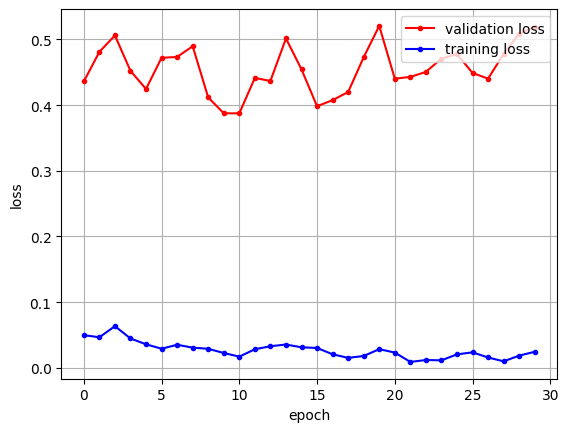

In [11]:
# Training loss 과 Validation loss 확인하기
loss = history.history['loss']
val_loss = history.history['val_loss']
print(loss)
print(val_loss)


# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 직접 설계한 모델과 비교해보기


In [15]:
# 모델 설계
input_layer=tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dense(512, activation='relu')(x)
output_layer=tf.keras.layers.Dense(10,activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

In [21]:
#  loss 함수, optimizer, metric 설정 & 모델 compile
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss, optimizer = optimizer, metrics = [metric])

In [22]:
# Training
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())
print()

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.9974 - loss: 0.0155 - val_categorical_accuracy: 0.9780 - val_loss: 0.4186
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9988 - loss: 0.0073 - val_categorical_accuracy: 0.9767 - val_loss: 0.4741
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9993 - loss: 0.0036 - val_categorical_accuracy: 0.9785 - val_loss: 0.4614
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9991 - loss: 0.0040 - val_categorical_accuracy: 0.9793 - val_loss: 0.4548
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9993 - loss: 0.0043 - val_categorical_accuracy: 0.9801 - val_loss: 0.4351
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9995 - loss: 0.0020 - val_categorical_accuracy: 0.9787 - val_loss: 0.4981
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9999 - loss: 3.58

In [24]:
# 성능 확인
loss = history.history['loss']
val_loss = history.history['val_loss']
print(loss)
print(val_loss)

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


[0.008848758414387703, 0.028623387217521667, 0.036712646484375, 0.02223067544400692, 0.014882579445838928, 0.012169848196208477, 0.007859913632273674, 0.011085988022387028, 0.005031984765082598, 0.013607664965093136, 0.019074639305472374, 0.01756671816110611, 0.014770342968404293, 0.02672782726585865, 0.023458201438188553, 0.012033485807478428, 0.01990124024450779, 0.022790513932704926, 0.01702980510890484, 0.012762500904500484, 0.01864943653345108, 0.010357039049267769, 0.009741660207509995, 0.010406902991235256, 0.006863181479275227, 0.010092493146657944, 0.0028097997419536114, 0.0010943033266812563, 0.0005867576692253351, 0.004991926718503237]
[0.7445112466812134, 0.7365610599517822, 0.7275862693786621, 0.6675021648406982, 0.7318581342697144, 0.677423357963562, 0.684102475643158, 0.6287572979927063, 0.6044792532920837, 0.6705150008201599, 0.7069026827812195, 0.6663607954978943, 0.7530918121337891, 0.7254723310470581, 0.6811394691467285, 0.641276478767395, 0.6947107911109924, 0.63019

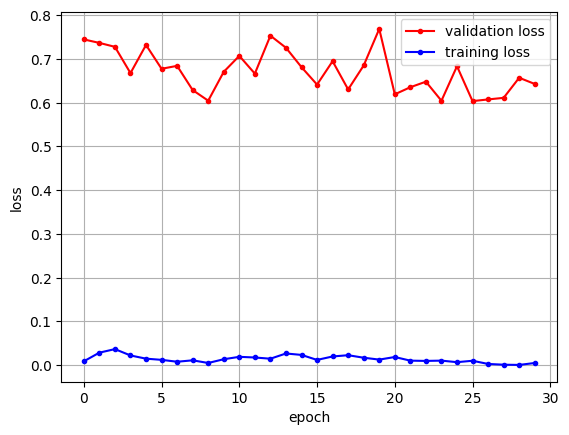

In [26]:
# 시각화
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Adam vs RMSprop 비교하기
# 시각화에서 truncated [10:]해보기 

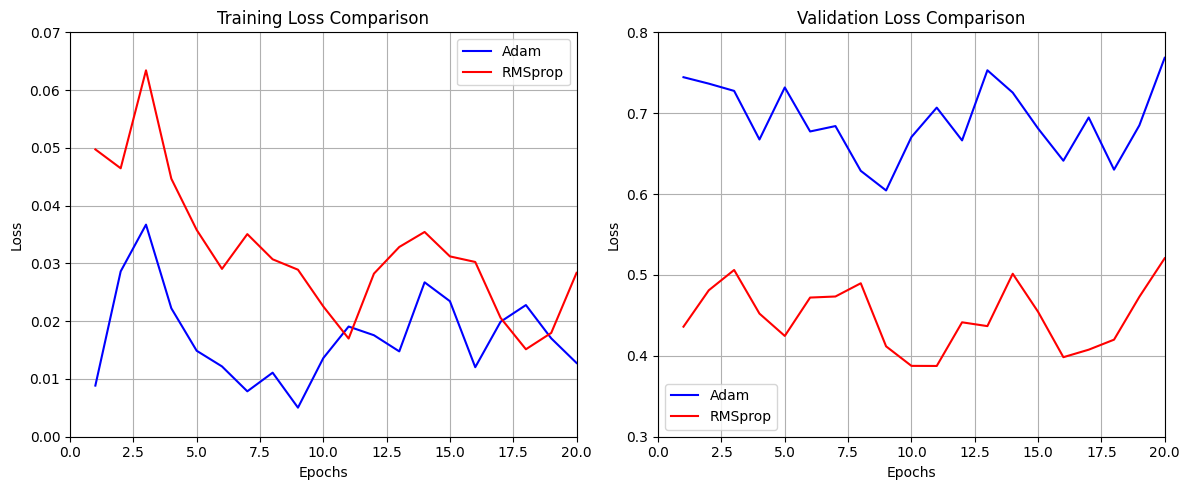

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Adam의 결과
adam_loss = [0.008848758414387703, 0.028623387217521667, 0.036712646484375, 0.02223067544400692, 0.014882579445838928, 0.012169848196208477, 0.007859913632273674, 0.011085988022387028, 0.005031984765082598, 0.013607664965093136, 0.019074639305472374, 0.01756671816110611, 0.014770342968404293, 0.02672782726585865, 0.023458201438188553, 0.012033485807478428, 0.01990124024450779, 0.022790513932704926, 0.01702980510890484, 0.012762500904500484]

adam_val_loss = [0.7445112466812134, 0.7365610599517822, 0.7275862693786621, 0.6675021648406982, 0.7318581342697144, 0.677423357963562, 0.684102475643158, 0.6287572979927063, 0.6044792532920837, 0.6705150008201599, 0.7069026827812195, 0.6663607954978943, 0.7530918121337891, 0.7254723310470581, 0.6811394691467285, 0.641276478767395, 0.6947107911109924, 0.630193293094635, 0.6849913597106934, 0.7685126066207886]

# RMSprop의 결과
rmsprop_loss = [0.04973767697811127, 0.04646586626768112, 0.06342171132564545, 0.04465942829847336, 0.035807572305202484, 0.029051953926682472, 0.035071827471256256, 0.030712412670254707, 0.028911039233207703, 0.022552724927663803, 0.016993017867207527, 0.02823249250650406, 0.03284430503845215, 0.03544265404343605, 0.03121519647538662, 0.030250005424022675, 0.020577264949679375, 0.015138729475438595, 0.017968233674764633, 0.02836867794394493]

rmsprop_val_loss = [0.4360547661781311, 0.4810895621776581, 0.5061641335487366, 0.4522342383861542, 0.4246065318584442, 0.47206419706344604, 0.4733797609806061, 0.4897310435771942, 0.4117414057254791, 0.3876049518585205, 0.3874952495098114, 0.44146695733070374, 0.43675652146339417, 0.5015084147453308, 0.4544855058193207, 0.39833828806877136, 0.4076199531555176, 0.42000263929367065, 0.47300443053245544, 0.5206454396247864]

epochs = range(1, 21)

plt.figure(figsize=(12, 5))

# Training Loss 비교
plt.subplot(1, 2, 1)
plt.plot(epochs, adam_loss, 'b-', label='Adam')
plt.plot(epochs, rmsprop_loss, 'r-', label='RMSprop')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.axis([0, 20, 0, 0.07])


# Validation Loss 비교
plt.subplot(1, 2, 2)
plt.plot(epochs, adam_val_loss, 'b-', label='Adam')
plt.plot(epochs, rmsprop_val_loss, 'r-', label='RMSprop')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.axis([0, 20, 0.3, 0.8])

plt.grid(True)

plt.tight_layout()
plt.show()

단순히 validation loss만으로 어떤 optimizer가 더 좋다고 판단하기는 어렵습니다. 두 optimizer를 비교했을 때 다음과 같은 특징들이 있습니다:
1. 안정성 측면:
- Adam은 더 안정적인 학습 곡선을 보여줍니다. Training loss와 validation loss 모두 완만하게 감소하는 패턴을 보입니다.
- RMSprop은 loss의 변동성이 더 큽니다. 특히 validation loss가 0.38에서 0.52 사이를 크게 오르내리는 것을 볼 수 있습니다.
2. 최종 성능:
- RMSprop이 validation loss 측면에서는 더 낮은 값을 기록했습니다.
- 하지만 test accuracy는 비슷한 수준입니다 (Adam: 97.62%, RMSprop: 97.82%)
3. 실용적 측면:
- Adam은 더 예측 가능한 학습 과정을 보여주므로 hyperparameter 튜닝이 더 쉽습니다.
- RMSprop은 더 낮은 loss를 달성할 수 있지만, 변동성이 크기 때문에 적절한 학습률 등을 찾기가 더 어려울 수 있습니다.
  
결론적으로:  
- 안정적인 학습이 필요하다면 Adam이 더 좋은 선택일 수 있습니다.
- 최적의 성능을 위해 hyperparameter 튜닝에 많은 시간을 투자할 수 있다면 RMSprop도 좋은 선택이 될 수 있습니다.
- 실제로 두 optimizer 모두 충분히 좋은 성능을 보여주므로, 프로젝트의 특성과 요구사항에 따라 선택하면 됩니다.

# 2-3 MLP 모델의 한계

### 원본 데이터를 살짝 변형했을 때 MLP 구조가 이미지를 잘 인식하는지 >> 코드로 확인

원본 데이터를 변형해서 MLP 구조의 성능 테스트하기

이번 스텝에서 사용할 OpenCV 라이브러리와 MNIST 데이터를 불러옵시다. 참고로 OpenCV 라이브러리는 이미지 데이터를 다루는 데에 매우 효과적인 도구들을 갖추고 있는 모듈입니다.

In [31]:
# OpenCV 모듈 불러오기
import cv2

# Q. 다시 한번 MNIST 데이터를 불러와 보세요.
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Q. MNIST 데이터가 어떻게 생겼는지 확인해 봅시다. (이전 스텝을 참고해서 코드를 작성해 보세요.)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


이번에는 MNIST 데이터에 장난을 조금 쳐보겠습니다.  
OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용합니다.

In [32]:
# 이미지 회전 변환 메트릭스 구하기 
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

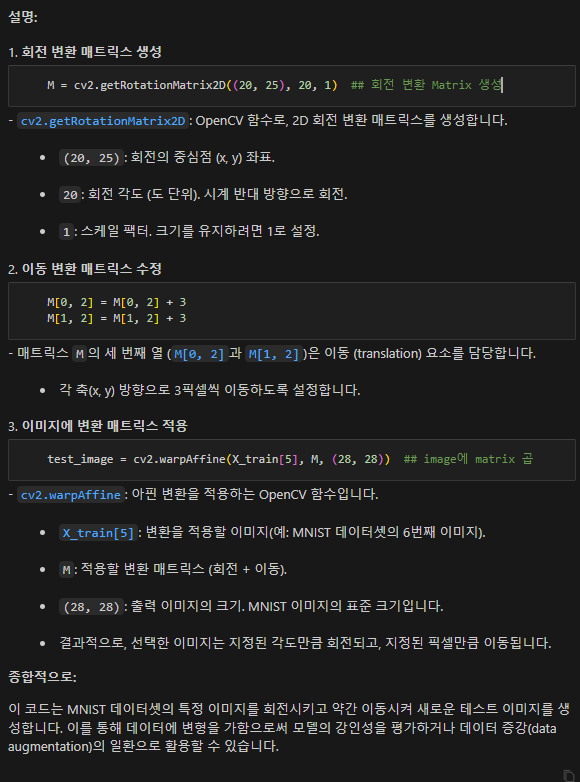

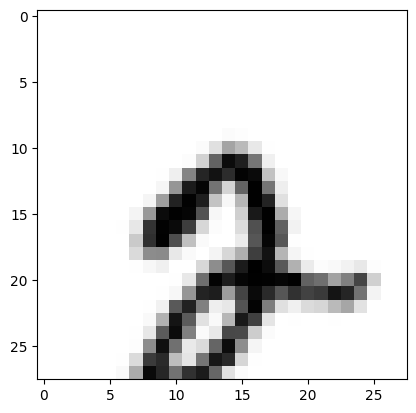

In [33]:
plt.imshow(test_image, cmap='Greys')

MLP 모델은 변환된 이미지도 분류를 잘 할 수 있을까요?
이전 스텝에서와 같이 이미지의 shape을 바꿔주고 모델에 넣어줍니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


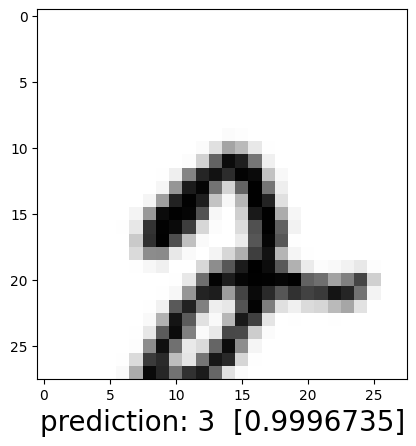

In [34]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

Y_prediction = model.predict(test_image_reshape)

index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

분명히 숫자 2를 나타낸 이미지였지만 간단한 변환을 적용했더니 모델은 데이터를 다른 숫자로 잘못 인식했습니다. 즉 MLP로 학습한 모델은 이미지 분류기로서는 robust classifier가 아니라는 것을 알 수 있습니다. MLP를 이용해서 이미지를 분류하는 데에는 뭔가 문제가 있는 것 같습니다.   
   
분명히 이전에 학습한 결과는 test loss가 매우 낮았으므로 분류 성능이 좋아야 하는데, 왜 이런 결과를 보이는 걸까요?